In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_time_between_failures(n, N, λ, m, μ):
    μ_pw = lambda x: (N - x) * μ \
        if N - m <= x <= N else m * μ \
        if 0 <= x < N - m else 1

    acc_sum = 0
    for j in range(n + 1, N + 1):
        acc_prod = 1
        for l in range(n, j):
            acc_prod *= μ_pw(l) / (l * λ)
        acc_sum += acc_prod / (j * λ)
    return acc_sum + pow(n * λ, -1)

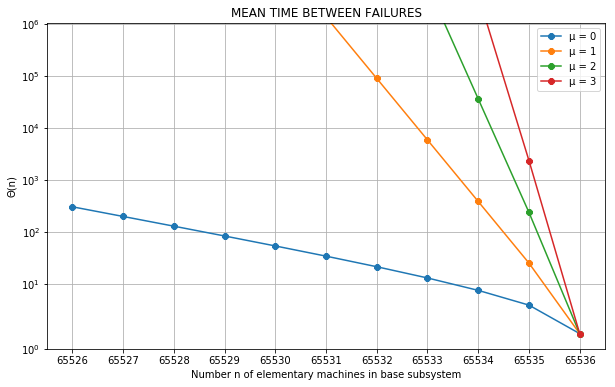

In [3]:
n, N = 65526, 65536
fig, ax_μ = plt.subplots(figsize=(10, 6))
x = [xi for xi in range(n, N+1)]

ax_μ.set_ylim(1, 4**10)
ax_μ.set_xticks([xi for xi in range(n, N+1)])
ax_μ.set_yscale('symlog')
ax_μ.grid()

ax_μ.set(title='MEAN TIME BETWEEN FAILURES', \
       xlabel='Number n of elementary machines in base subsystem', \
       ylabel='Θ(n)')
for μi in range(4):
    y = [mean_time_between_failures(ni, N, λ=1e-5, m=1, μ=10**μi) for ni in range(n, N+1)]
    ax_μ.plot(x, y, '8-', label='μ = {0}'.format(μi))
    ax_μ.legend()
plt.rcParams.update({'font.size': 14})
plt.show()

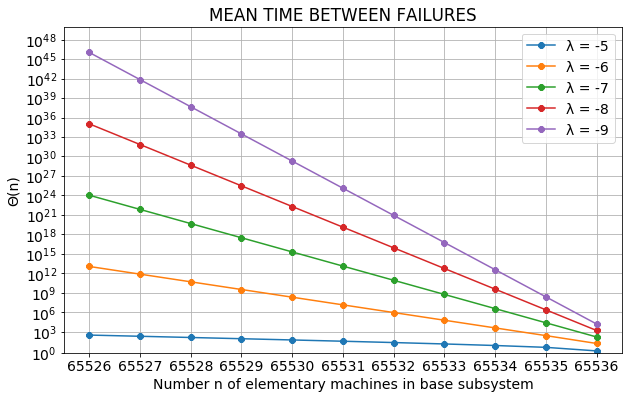

In [4]:
fig, ax_λ = plt.subplots(figsize=(10, 6))
ax_λ.set_ylim(bottom=1, top=1e50)
ax_λ.set_xticks([xi for xi in range(n, N+1)])
ax_λ.set_yscale('symlog')
ax_λ.grid()

ax_λ.set(title='MEAN TIME BETWEEN FAILURES', \
       xlabel='Number n of elementary machines in base subsystem', \
       ylabel='Θ(n)')

for λi in range(-5, -10, -1):
    y = [mean_time_between_failures(ni, N, λ=10**λi, m=1, μ=1) for ni in range(n, N+1)]
    ax_λ.plot(x, y, '8-', label='λ = 1e{0}'.format(λi))
    ax_λ.legend()
plt.show()

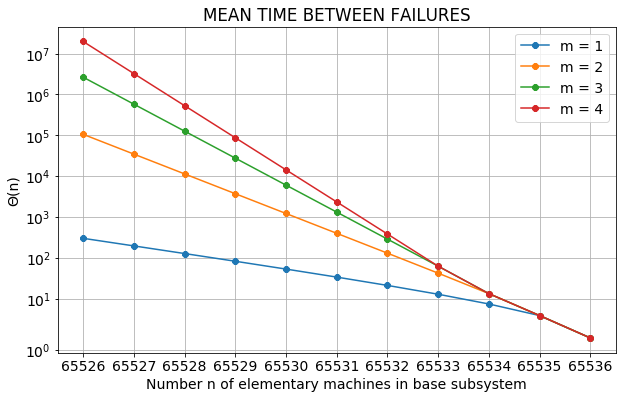

In [5]:
fig, ax_m = plt.subplots(figsize=(10, 6))
ax_m.set_xticks([xi for xi in range(n, N+1)])
ax_m.set_yscale('symlog')
ax_m.grid()

ax_m.set(title='MEAN TIME BETWEEN FAILURES', \
       xlabel='Number n of elementary machines in base subsystem', \
       ylabel='Θ(n)')
for mi in range(1, 5, 1):
    y = [mean_time_between_failures(ni, N, λ=1e-5, m=mi, μ=1) for ni in range(n, N+1)]
    ax_m.plot(x, y, '8-', label='m = {0}'.format(mi))
    ax_m.legend()
plt.show()